<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

<font size=6>Foundations of Biomedical Computing</font>

<font size=5>Worksheet #2b - NumPy: Computations</font>

The focus of this assignment will be on the computational tools built into NumPy. These include aggregations, universal functions, masks, and sorting.
<br>
Understanding these computational tools in NumPy will make your life as a data scientist easier and more efficient. 

___

In [1]:
import numpy as np

___

<font size=5>Section 1: Aggregations</font>

Some of the most useful built-in NumPy methods are the aggregations. This is the case as often when faced with daunting amounts of data, a first step is to compute summary statistics for the data in question. Perhaps the most common summary statistics are the mean and standard deviation, which allow you to summarize the "typical" values in a dataset, but other aggregates are useful as well, such as the sum, product, median, minimum and maximum, quantiles, etc..
<br>
<br>


___

There are a vast number of statistical aggregations present in NumPy, and the whole list can be found here: https://numpy.org/doc/stable/reference/routines.statistics.html

1\. Create a 1D numpy array of 1000 random numbers from 0 to 999.
<br>
Now use numpy commands to find the following for the array:
- The Mean, Median, Max, and Min
[//]: # (Hello)


In [2]:
arr = np.random.randint(0,1000,size=1000)
print(arr)
print(np.mean(arr))
print(np.median(arr))
print(np.min(arr))


[ 91 126 376 376 867 335 915 584  33 649 876 364 193  11 529 174 668   0
 491 710  50 558 822 898 188  19  64 677 911 804  73 990 659 599 945  82
 503 539  50 918 177 788 971 168 953 288 832 902 795  89 862 311 903 155
 798 104 287  23 458 879 112 712 675 597  53 798 243 946 994  90 660 933
 835 595 122  93 653 212 489  37 553 240 822 730  32 776  43 841 877 323
 546 702 335 895 110  96 422 658 375 938 844 878 318 304 901 780 524   2
   3  85  94 886 136 454 956 333 784 386   5  39 777  20 689 540 617 592
 567 965 254 633 301 325  18 450 251 751  57 185  79 484 412 474 390  31
 777 671 295 621 204 930 356 247 469 333 960 520 870 288 964 420 577 239
 440 566 638 635 478   3 770 785 368 110 313 659 384 516 404 483 962 671
 976 305 471 102 242 142 206 785 610  45 347 183 377 328  59 269 955  17
 195 849 978 694 992 359 800 925 340 521 190 952 625 455 426 846 702 810
 387 730  54 119 618 758 808 697 716  17 342 442 407 379  33  44 351  75
 529 241 616 874 323 171 151 362 535 100  87 979 92

2\. Now create a 2D, 2x25 numpy array of random numbers from 0 to 999 and calculate the following:
- The Sum for axis = 0
- The Sum for axis = 1
- The total sum

What is the size of the output array for each of those sums? From this, what does it mean to perform an operation on axis=0 and axis=1? 

In [3]:
arr = np.random.randint(0,1000,size=(2,25))
print(arr)
print(np.sum(arr, axis=0))
print(np.sum(arr, axis=1))
print(np.sum(arr))

# the size of the output array for summing axis=0 is 25. this is since it is performing the sum of each column in the 2x25 array
# the size of the output array for summing axis=1 is 2. this is since it is performing the sum of each row in the 2x25 array

[[968 892  68 269 182 717 573 978 536  39 322 114 844 114 536 878 777 412
  693 748 126 680 623 817 429]
 [555 857 439 639 463 409 967 915 561 284 431 415 285 470 321  80 787 394
  927 771 739 465 965 156 482]]
[1523 1749  507  908  645 1126 1540 1893 1097  323  753  529 1129  584
  857  958 1564  806 1620 1519  865 1145 1588  973  911]
[13335 13777]
27112


___

<font size=5>Section 2: Universal Functions</font>

There are a vast number of universal functions present in NumPy, and though many of them seem trivial to implement and use, the ease of use and speedup provided by NumPy make these functions critical.
<br>
<br>


NumPy also has UFunctions for more complex operations like logs, sqrt, cos, sin, abs, etc.

___

<font size=5>Section 3: Comparisons, Masks, and Boolean Logic</font>

Arguably the most empowering use of NumPy is masking. Masking allows you to quickly and easily filter large amounts of data from an array. For instance, masking comes up when you want to extract, modify, count, or otherwise manipulate values in an array based on some criterion:
<br>
<br>
For example, you might wish to count all values greater than a certain value, or perhaps remove all outliers that are above some threshold. In NumPy, Boolean masking is often the most efficient way to accomplish these types of tasks.

**Lets use the example of counting rainy days:**
<br>
For a moment let's imagine we have a series of data that represents the amount of precipitation each day for a year in a given city. In this case, we will load the daily rainfall statistics for the city of Seattle in 2014, using Pandas (which is the topic for the next lecture):

In [4]:
import numpy as np
import pandas as pd

# use pandas to extractSeattle rainfall inches as a NumPy array
rainfall = pd.read_csv('Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0  # 1/10mm -> inches


We can see that the array contains 365 values, giving daily rainfall in inches from January 1 to December 31, 2014.
<br>
As a first quick visualization, let's look at the histogram of rainy days, which was generated using Matplotlib (we will explore this tool more fully in a few weeks from now):

Text(0.5, 1.0, 'Histogram of daily rainfall in inches')

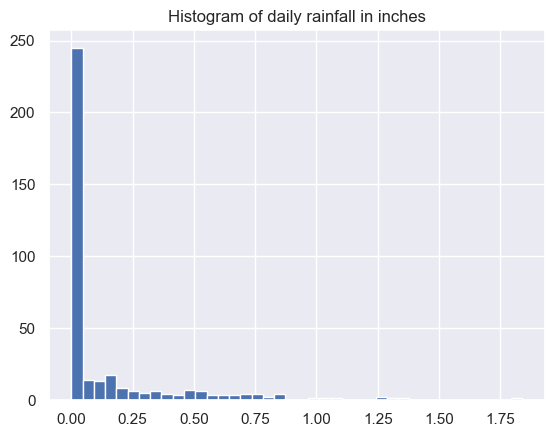

In [5]:
#%matplotlib inline - i commented this out to see the graph   
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles
plt.hist(inches, 40)
plt.title('Histogram of daily rainfall in inches')

This histogram gives us a general idea of what the data looks like, However, it doesn't do a good job of conveying some information we'd like to see: 
- How many rainy days were there in the year? 
- What is the average precipitation on those rainy days? 
- How many days were there with more than half an inch of rain?

As you know, comparison operators (`<`, `>`) are also available as UFunctions to NumPy arrays (see this lecture and the last worksheet), so armed with this knowledge, we can do a lot to analyze this data.
<br>
<br>
But before that let's review the counting UFunctions built into NumPy.  Here are some examples:

4\. The following code creates a 3x4 2D array with values between 0 and 9 and a starting random state of 17.
<br>
Study the code and see how it solves the following problems. Uncomment each line to see the result.

- Generate a boolean array of which values are greater than 4
- Count the number of values less than 4
- Count the number of values less than 4 in another way, using a function we already know (remember that true=1)
- Find the number of values less than 4 in each row
- Find the number of values less than 4 in each column
- Find if there are any values greater than 8 (should return True or False)
- Find if there are any values less than 0 (should return True or False)
- Find if all values are less than 10 (should return True or False)
[//]: # (Hello)

Notice that all of these problems are solved with a single UFunction call.


In [33]:
import numpy as np
np.random.seed(17)
x = np.random.randint(9,size=(3,4))
print(x)
#x < 4
np.count_nonzero(x < 4)
np.sum(x < 4)
np.sum(x < 4, axis=1)
np.sum(x < 6, axis=0)
np.any(x > 8)
np.any(x < 0)
np.all(x < 10)

[[1 6 6 0]
 [6 4 7 4]
 [7 1 1 8]]


np.True_

5\. Now using what you know from above, find the following from our Seattle data:
- The number of days without rain
- The number of days with rain
- Days with  more than 0.5 inches of rain
- Rainy days with less than 0.2 inches of rain
- The number of days between .5 and 1 inches of rain
[//]: # (Hello)
Once again, everything can be done with a single Ufunction call

In [38]:
days_without_rain = np.sum(rainfall == 0)
days_with_rain = np.sum(rainfall > 0)
days_heavy_rain = np.sum(rainfall > 0.5)
days_light_rain = np.sum(rainfall < 0.2)
days_medium_rain = np.sum((rainfall > 0.5) & (rainfall < 1))

print(f"Days without rain: {days_without_rain}")
print(f"Days with rain: {days_with_rain}")
print(f"Days with >0.5 inches of rain: {days_heavy_rain}")
print(f"Rainy days with <0.2 inches: {days_light_rain}")
print(f"Days with rainfall between 0.5-1 inches: {days_medium_rain}")


Days without rain: 215
Days with rain: 150
Days with >0.5 inches of rain: 150
Rainy days with <0.2 inches: 215
Days with rainfall between 0.5-1 inches: 0


In the preceding sections we looked at aggregates computed directly on Boolean arrays. A more powerful pattern is to use Boolean arrays as masks, to select particular subsets of the data themselves. Returning to our work from question 4, this time with masks, solve the following problem.

6\. Using the same initial array from question 4:
- Return a new array with only values less than 5 
[//]: # (Hello)
Once again, everything can be done with a Ufunction call, that looks sorta like a list comprehension

In [41]:
newArray = x[x<5]
print(newArray)

[1 0 4 4 1 1]


Finally, lets apply everything we have learned so far to our rainfall example:

7\. Using masks and UFunctions, find the following:
- Median precipitation on rainy days in 2014
- 25th Percentile precipitation on summer days in 2014
- Maximum precipitation on summer days in 2014
- Standard Deviation precipitation on non-summer rainy days

In [49]:
print(np.median(rainfall))

summerPrecipitation = rainfall[172:265] #summer days between day number 172 and 265 (June 21 to Sept 22)
print(np.quantile(summerPrecipitation, 0.25))
print(np.max(summerPrecipitation))

nonSummerRainyDays = np.concatenate([rainfall[:171], rainfall[264:]])
nonSummerRainyDays = nonSummerRainyDays[nonSummerRainyDays>0]
print(np.std(nonSummerRainyDays))

0.0
0.0
216
85.448083336809


___

<font size=5>Section 4: Sorting</font>

I wont go into the performance considerations of sorting here, but rest assured that sorting using the built in NumPy (or even python) methods is going to be much quicker than anything we can realistically throw together, and when working with massive datasets, this becomes a huge deal.

8\. Generate a 1d array with 20 random entries between 0 and 99
- Sort the array via a view
- Sort the array in place


In [51]:
arr = np.random.randint(0,100,size=20)
print(arr)
sortedView = np.sort(arr)
arr.sort()

[13 56 27 83 50 49 60  8 51 27 87 63 26 91 56 57 79 74  2 49]


8\. Generate a 2d array with 54 random entries (6x9) between 0 and 9
- Sort the array
- Sort the array along each column
- Sort the array along each row

In [60]:
arr = np.random.randint(0,10,size=(6,9))
print(arr)
sortedArr = np.sort(arr.flatten()).reshape(6,9)
print(sortedArr)

colSort = np.sort(arr, axis=0)
print(colSort)

rowSort = np.sort(arr, axis=1)
print(rowSort)

[[3 1 5 1 1 3 3 4 4]
 [3 3 4 1 9 3 4 7 6]
 [3 1 6 5 2 6 0 8 5]
 [4 8 0 8 6 6 3 2 1]
 [0 7 3 6 3 1 4 4 1]
 [3 0 7 7 7 4 0 0 4]]
[[0 0 0 0 0 0 1 1 1]
 [1 1 1 1 1 2 2 3 3]
 [3 3 3 3 3 3 3 3 3]
 [4 4 4 4 4 4 4 4 4]
 [5 5 5 6 6 6 6 6 6]
 [7 7 7 7 7 8 8 8 9]]
[[0 0 0 1 1 1 0 0 1]
 [3 1 3 1 2 3 0 2 1]
 [3 1 4 5 3 3 3 4 4]
 [3 3 5 6 6 4 3 4 4]
 [3 7 6 7 7 6 4 7 5]
 [4 8 7 8 9 6 4 8 6]]
[[1 1 1 3 3 3 4 4 5]
 [1 3 3 3 4 4 6 7 9]
 [0 1 2 3 5 5 6 6 8]
 [0 1 2 3 4 6 6 8 8]
 [0 1 1 3 3 4 4 6 7]
 [0 0 0 3 4 4 7 7 7]]


___

<font size=5>Continued Training for the Love Data Week Games</font>

Love Data Week is coming up soon - It's Feb 10-14!

(There will be seminars and data-inspired activities in the real world, but we'll imagine a fictitious charity games day to practice numpy skills.)

Team Toasted Ravioli and Team Bread-sliced Bagels now begin training for the pi eating contest.

First our teams must find some pi.

<font size=3>Hide the pi</font>

9a\. Your first job is to create a grid in which to hide the pi.  Do this by creating a numpy array with six rows and eight columns, filled with random integers between 0 and 9. To prepare the grid to receive pi, though, convert it to float format after creating it.

In [65]:
hidePi = np.random.randint(0,10,size=(6,8)).astype(float)
print(hidePi)


[[0. 6. 3. 9. 2. 5. 7. 9.]
 [0. 0. 4. 5. 5. 2. 4. 8.]
 [7. 3. 4. 5. 5. 1. 5. 2.]
 [4. 9. 2. 3. 6. 3. 1. 2.]
 [0. 6. 2. 0. 6. 4. 2. 7.]
 [0. 0. 1. 3. 9. 9. 4. 0.]]


9b\. Now use numpy commands to create a boolean mask of the same size as your pi grid, randomly filled with boolean True and False.

In [66]:
boolMask = np.random.choice([True, False], size=(6, 8))
print(boolMask)

[[False  True  True False False False False False]
 [False  True  True  True  True False  True False]
 [False  True False  True False  True False False]
 [False  True  True False False False False False]
 [False  True  True False False False  True  True]
 [ True  True  True  True  True False  True  True]]


9c\. Finally, use your boolean mask to hide pi (np.pi) in the locations of your grid corresponding to True in your mask.

In [67]:
hidePi[boolMask] = np.pi
print(hidePi)

[[0.         3.14159265 3.14159265 9.         2.         5.
  7.         9.        ]
 [0.         3.14159265 3.14159265 3.14159265 3.14159265 2.
  3.14159265 8.        ]
 [7.         3.14159265 4.         3.14159265 5.         3.14159265
  5.         2.        ]
 [4.         3.14159265 3.14159265 3.         6.         3.
  1.         2.        ]
 [0.         3.14159265 3.14159265 0.         6.         4.
  3.14159265 3.14159265]
 [3.14159265 3.14159265 3.14159265 3.14159265 3.14159265 9.
  3.14159265 3.14159265]]


10a\. Now that the pi are hidden, use numpy commands to slice the grid into two equal parts (vertically or horizontally) and give one part to each team.

In [70]:
ravioli = hidePi[:3, :]
bagel = hidePi[3:, :] 
print(ravioli)
print(bagel)

[[0.         3.14159265 3.14159265 9.         2.         5.
  7.         9.        ]
 [0.         3.14159265 3.14159265 3.14159265 3.14159265 2.
  3.14159265 8.        ]
 [7.         3.14159265 4.         3.14159265 5.         3.14159265
  5.         2.        ]]
[[4.         3.14159265 3.14159265 3.         6.         3.
  1.         2.        ]
 [0.         3.14159265 3.14159265 0.         6.         4.
  3.14159265 3.14159265]
 [3.14159265 3.14159265 3.14159265 3.14159265 3.14159265 9.
  3.14159265 3.14159265]]


<font size=3>Eat the pi</font>

10b\. For each team, write code that reports how many pi are in their grid. Then, each team must eat their pi by replacing each instance of pi with the mean value of their grids using np.where( ). Show the new grids for each team.

In [75]:
print(np.sum(ravioli==np.pi))
print(np.sum(bagel==np.pi))
mean1 = np.mean(ravioli)
mean2 = np.mean(bagel)
ravioli = np.where(ravioli == np.pi, mean1, ravioli)
bagel = np.where(bagel == np.pi, mean2, bagel)

print(ravioli)
print(bagel)

0
0
[[0.         4.01733027 4.01733027 9.         2.         5.
  7.         9.        ]
 [0.         4.01733027 4.01733027 4.01733027 4.01733027 2.
  4.01733027 8.        ]
 [7.         4.01733027 4.         4.01733027 5.         4.01733027
  5.         2.        ]]
[[4.         3.28502935 3.28502935 3.         6.         3.
  1.         2.        ]
 [0.         3.28502935 3.28502935 0.         6.         4.
  3.28502935 3.28502935]
 [3.28502935 3.28502935 3.28502935 3.28502935 3.28502935 9.
  3.28502935 3.28502935]]


Finally, the teams calculate their score by summing all of the elements of their grid.  Which team had the largest sum?

In [77]:
sum1 = np.sum(ravioli)
sum2 = np.sum(bagel)
print(sum1)
print(sum2)

if (sum1 > sum2):
    print("Ravioli had the largest sum")
else:
    print("Bagel had the largest sum")




105.17330272329079
80.70538160236146
Ravioli had the largest sum


10\. If you have any additional questions, comments, or concerns, please state them below and we will do our best to address them